# Problem set 1

*Author: Danilo Lessa Bernardineli (danilo.bernardineli@usp.br)*

## Dependences

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from functools import reduce

## Problem 1 - Logistic Map

Obtain the numerical values for figures 1 through 5 for the "Simple mathematical models with very complicated systems" article, and discuss the interpretations for each of them.

### Numerical output

In [2]:
@np.vectorize
def logistic_map(X: np.array, a: float) -> np.array:
    return a * X * (1 - X)

def recursive_logistic_map(x: float, a: float, N: int=1) -> float:
    for n in range(N):
        x = logistic_map(x, a)
        yield x
        
def logistic_lyapunov_exponent(a: float) -> float:
    x = np.random.random()
    X = np.array(list(recursive_logistic_map(x, a, 10000)))
    derivatives = a * (1 - 2 * X)
    factors = np.log(np.abs(derivatives))
    lyapunov_exponent = np.sum(factors) / X.shape[0]
    return lyapunov_exponent

#### Figure 1

(X_t) 0.03 -> 0.08 (a) or 0.10 (b)
(X_t) 0.25 -> 0.51 (a) or 0.64 (b)
(X_t) 0.29 -> 0.56 (a) or 0.71 (b)
(X_t) 0.43 -> 0.67 (a) or 0.84 (b)
(X_t) 0.47 -> 0.67 (a) or 0.85 (b)
(X_t) 0.68 -> 0.59 (a) or 0.75 (b)
(X_t) 0.74 -> 0.52 (a) or 0.65 (b)
(X_t) 0.80 -> 0.44 (a) or 0.55 (b)
(X_t) 0.81 -> 0.41 (a) or 0.52 (b)
(X_t) 0.93 -> 0.17 (a) or 0.22 (b)


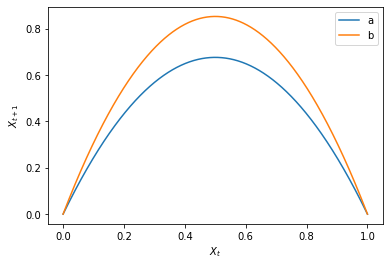

In [3]:
# Parameters
N = 1000
a = 2.707
b = 3.414
x_0 = np.linspace(0, 1, N)

# Numeric calculation
x_a = logistic_map(x_0, a)
x_b = logistic_map(x_0, b)

# Print random values for X_t and X_{t+1}
values = list(zip(x_0, x_a, x_b))
for tup in sorted(random.choices(values, k=10)):
    print("(X_t) {:.2f} -> {:.2f} (a) or {:.2f} (b)".format(*tup))

# Plot
plt.plot(x_0, x_a, label='a')
plt.plot(x_0, x_b, label='b')
plt.xlabel("$X_t$")
plt.ylabel("$X_{t+1}$")
plt.legend()
plt.show()

#### Figure 2 and 3

(X_t) 0.21 -> 0.67 (a=2.707) or 0.84 (a=3.414)
(X_t) 0.27 -> 0.67 (a=2.707) or 0.75 (a=3.414)
(X_t) 0.35 -> 0.64 (a=2.707) or 0.59 (a=3.414)
(X_t) 0.43 -> 0.60 (a=2.707) or 0.47 (a=3.414)
(X_t) 0.46 -> 0.60 (a=2.707) or 0.44 (a=3.414)
(X_t) 0.57 -> 0.60 (a=2.707) or 0.47 (a=3.414)
(X_t) 0.65 -> 0.64 (a=2.707) or 0.59 (a=3.414)
(X_t) 0.79 -> 0.67 (a=2.707) or 0.84 (a=3.414)
(X_t) 0.96 -> 0.23 (a=2.707) or 0.35 (a=3.414)
(X_t) 0.97 -> 0.17 (a=2.707) or 0.26 (a=3.414)


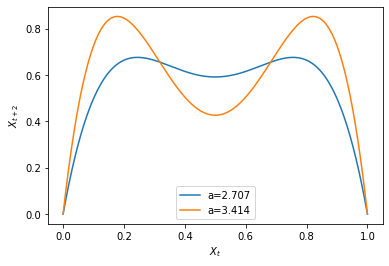

In [4]:
# Parameters
N = 1000
a = 2.707
b = 3.414
x_0 = np.linspace(0, 1, N)

# Numeric calculation
x_a = logistic_map(logistic_map(x_0, a), a)
x_b = logistic_map(logistic_map(x_0, b), b)

# Print random values for X_t and X_{t+1}
values = list(zip(x_0, x_a, x_b))
for tup in sorted(random.choices(values, k=10)):
    print("(X_t) {:.2f} -> {:.2f} (a=2.707) or {:.2f} (a=3.414)".format(*tup))

# Plot
plt.plot(x_0, x_a, label='a={}'.format(a))
plt.plot(x_0, x_b, label='a={}'.format(b))
plt.xlabel("$X_t$")
plt.ylabel("$X_{t+2}$")
plt.legend()
plt.show()

#### Figure 4.a

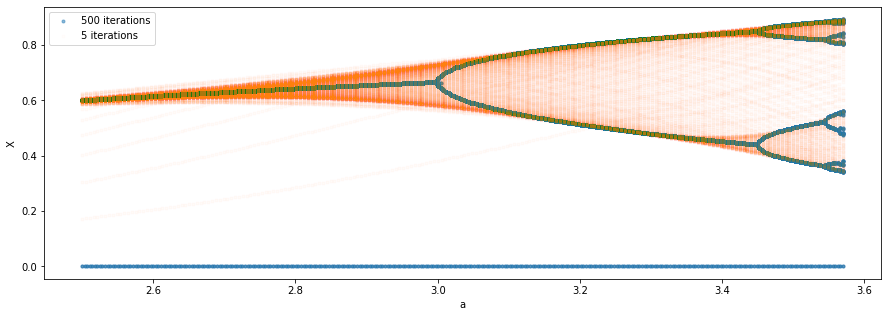

In [5]:
plt.figure(figsize=(15, 5))

# Convergence
N_x = 100
N_a = 300
M = 500
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(2.5, 3.57, N_a)

points = []
for a in A:
    x_f = list(recursive_logistic_map(x_0, a, M))[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
plt.plot(a, x, '.', alpha=0.5, label="{} iterations".format(M))

# First 5 iterations
N_x = 500
N_a = 200
M = 5
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(2.5, 3.57, N_a)

points = []
for a in A:
    x_f = list(recursive_logistic_map(x_0, a, M))[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
plt.plot(a, x, '.', alpha=0.01, label="{} iterations".format(M))

plt.xlabel("a")
plt.ylabel("X")
plt.legend()

plt.show()

#### Figure 4.b

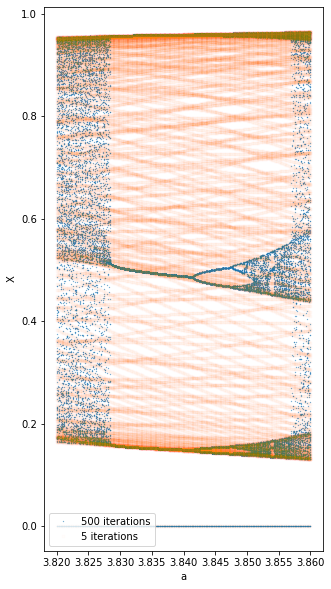

In [6]:
plt.figure(figsize=(5, 10))

# Convergence
N_x = 100
N_a = 400
M = 500
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(3.82, 3.86, N_a)

points = []
for a in A:
    x_f = list(recursive_logistic_map(x_0, a, M))[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
plt.plot(a, x, '.', alpha=1.0, markersize=0.5, label="{} iterations".format(M))

# First 5 iterations
N_x = 500
N_a = 200
M = 5
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(3.82, 3.86, N_a)

points = []
for a in A:
    x_f = list(recursive_logistic_map(x_0, a, M))[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
plt.plot(a, x, '.', alpha=0.01, label="{} iterations".format(M))

plt.xlabel("a")
plt.ylabel("X")
plt.legend()

plt.show()

#### Figure 5

(X_t) 0.25 -> 0.64 (a) or 0.72 (b)
(X_t) 0.31 -> 0.88 (a) or 0.97 (b)
(X_t) 0.45 -> 0.75 (a) or 0.43 (b)
(X_t) 0.46 -> 0.74 (a) or 0.41 (b)
(X_t) 0.49 -> 0.71 (a) or 0.34 (b)
(X_t) 0.59 -> 0.83 (a) or 0.62 (b)
(X_t) 0.69 -> 0.89 (a) or 0.97 (b)
(X_t) 0.71 -> 0.81 (a) or 0.91 (b)
(X_t) 0.76 -> 0.55 (a) or 0.60 (b)
(X_t) 0.95 -> 0.92 (a) or 0.94 (b)


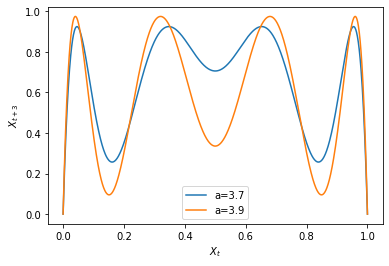

In [7]:
# Parameters
N = 1000
a = 3.7
b = 3.9
x_0 = np.linspace(0, 1, N)

# Numeric calculation
x_a = list(recursive_logistic_map(x_0, a, 3))[-1]
x_b = list(recursive_logistic_map(x_0, b, 3))[-1]

# Print random values for X_t and X_{t+1}
values = list(zip(x_0, x_a, x_b))
for tup in sorted(random.choices(values, k=10)):
    print("(X_t) {:.2f} -> {:.2f} (a) or {:.2f} (b)".format(*tup))

# Plot
plt.plot(x_0, x_a, label='a={}'.format(a))
plt.plot(x_0, x_b, label='a={}'.format(b))
plt.xlabel("$X_t$")
plt.ylabel("$X_{t+3}$")
plt.legend()
plt.show()

### Discussions



## Problem 2 - Lyanpunov exponents on Logistic Map

### P2.a

* Do numerical calculations for the logistic map bifurcation diagram by setting the control parameter on the interval $a \in [1, 4]$.
* Plot the Lyanpunov exponent in terms of the control parameter.

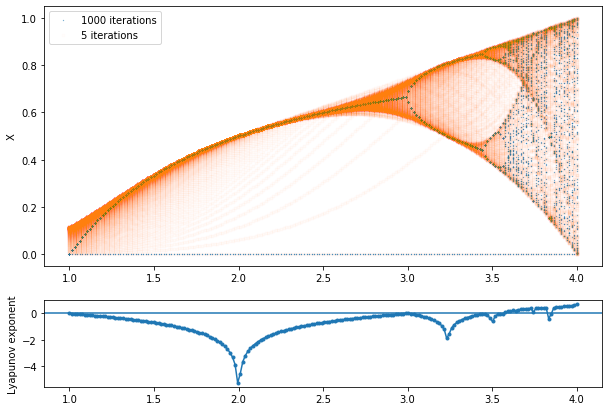

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 7), gridspec_kw={'height_ratios': [3, 1]})


# Parameters
a_i = 1.0
a_f = 4.0

# Convergence
N_x = 100
N_a = 200
M = 1000
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(a_i, a_f, N_a)

points = []
exponents = []
for a in A:
    X = list(recursive_logistic_map(x_0, a, M))
    x_f = X[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
ax1.plot(a, x, '.', alpha=1.0, markersize=0.5, label="{} iterations".format(M))

# First 5 iterations
N_x = 500
N_a = 200
M = 5
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(a_i, a_f, N_a)

points = []
for a in A:
    x_f = list(recursive_logistic_map(x_0, a, M))[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
ax1.plot(a, x, '.', alpha=0.01, label="{} iterations".format(M))
ax1.set_ylabel("X")
ax1.legend()

## Lyapunov

# Parameters
N_a = 200
A = np.linspace(a_i, a_f, N_a)
points = [(a, logistic_lyapunov_exponent(a)) for a in A]
(x, y) = list(zip(*points))
ax2.plot(x, y, '.-')
ax2.set_ylabel("Lyapunov exponent")
ax2.axhline(0)

plt.show()

### P2.b

* Make an zoom for the above plots for the following control parameter intervals:
    * $a \in [3.4, 4.0]$
    * $a \in [3.82, 3.86]$

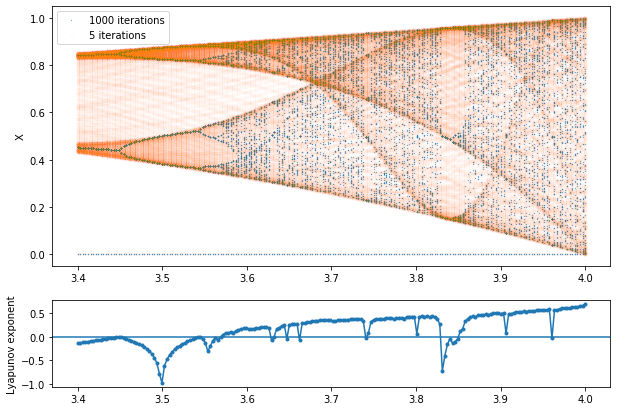

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 7), gridspec_kw={'height_ratios': [3, 1]})


# Parameters
a_i = 3.4
a_f = 4.0

# Convergence
N_x = 100
N_a = 200
M = 1000
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(a_i, a_f, N_a)

points = []
exponents = []
for a in A:
    X = list(recursive_logistic_map(x_0, a, M))
    x_f = X[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
ax1.plot(a, x, '.', alpha=1.0, markersize=0.5, label="{} iterations".format(M))

# First 5 iterations
N_x = 500
N_a = 200
M = 5
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(a_i, a_f, N_a)

points = []
for a in A:
    x_f = list(recursive_logistic_map(x_0, a, M))[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
ax1.plot(a, x, '.', alpha=0.01, label="{} iterations".format(M))
ax1.set_ylabel("X")
ax1.legend()

## Lyapunov

# Parameters
N_a = 200
A = np.linspace(a_i, a_f, N_a)
points = [(a, logistic_lyapunov_exponent(a)) for a in A]
(x, y) = list(zip(*points))
ax2.plot(x, y, '.-')
ax2.set_ylabel("Lyapunov exponent")
ax2.axhline(0)

plt.show()

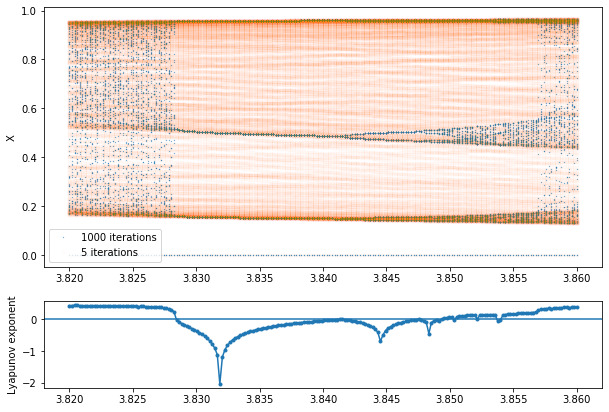

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 7), gridspec_kw={'height_ratios': [3, 1]})


# Parameters
a_i = 3.82
a_f = 3.86

# Convergence
N_x = 100
N_a = 200
M = 1000
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(a_i, a_f, N_a)

points = []
exponents = []
for a in A:
    X = list(recursive_logistic_map(x_0, a, M))
    x_f = X[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
ax1.plot(a, x, '.', alpha=1.0, markersize=0.5, label="{} iterations".format(M))

# First 5 iterations
N_x = 500
N_a = 200
M = 5
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(a_i, a_f, N_a)

points = []
for a in A:
    x_f = list(recursive_logistic_map(x_0, a, M))[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
ax1.plot(a, x, '.', alpha=0.01, label="{} iterations".format(M))
ax1.set_ylabel("X")
ax1.legend()

## Lyapunov

# Parameters
N_a = 200
A = np.linspace(a_i, a_f, N_a)
points = [(a, logistic_lyapunov_exponent(a)) for a in A]
(x, y) = list(zip(*points))
ax2.plot(x, y, '.-')
ax2.set_ylabel("Lyapunov exponent")
ax2.axhline(0)

plt.show()

## Problem 3 - Strange Attractor

Obtain the numerical values for figure 2 through 6 for the "A two-dimensional mapping with a strange attractor" article, and discuss the interpretations for each of them.

### Numerical output

In [3]:
from typing import Tuple

def strange_map(x: float, y: float, a: float, b: float) -> Tuple[float, float]:
    new_x = y + 1 - a * x ** 2
    new_y = b * x
    return (new_x, new_y)


def recursive_strange_map(x: float, y: float, a: float, b: float, N: int=1) -> float:
    for n in range(N):
        (x, y) = strange_map(x, y, a, b)
        yield (x, y)

#### Figure 2

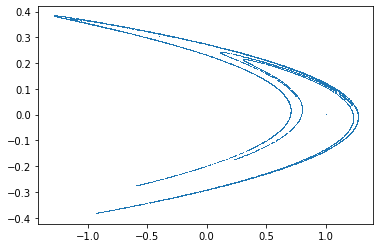

In [4]:
x_0 = 0
y_0 = 0
a = 1.4
b = 0.3
N = 10000
(X, Y) = list(zip(*recursive_strange_map(x_0, y_0, a, b, N)))

plt.plot(X, Y, ',')
plt.show()

#### Figure 3

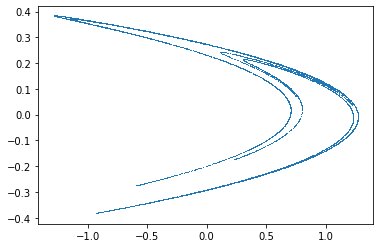

In [49]:
x_0 = 0.63135448
y_0 = 0.18940634
a = 1.4
b = 0.3
N = 10000
(X, Y) = list(zip(*recursive_strange_map(x_0, y_0, a, b, N)))

plt.plot(X, Y, ',')
plt.show()

#### Figure 4

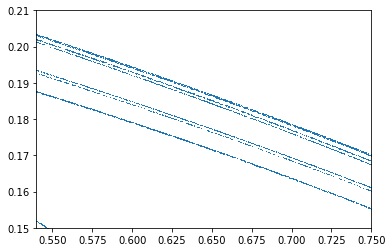

In [52]:
x_0 = 0.63135448
y_0 = 0.18940634
a = 1.4
b = 0.3
N = 100000
(X, Y) = list(zip(*recursive_strange_map(x_0, y_0, a, b, N)))

plt.plot(X, Y, ',')
plt.xlim((0.54, 0.75))
plt.ylim((0.15, 0.21))
plt.show()

#### Figure 5

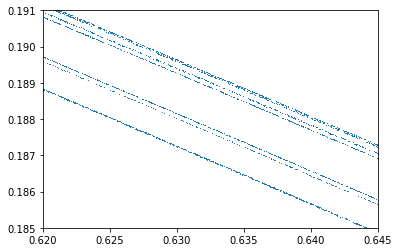

In [53]:
x_0 = 0.63135448
y_0 = 0.18940634
a = 1.4
b = 0.3
N = 1000000
(X, Y) = list(zip(*recursive_strange_map(x_0, y_0, a, b, N)))

plt.plot(X, Y, ',')
plt.xlim((0.620, 0.645))
plt.ylim((0.185, 0.191))
plt.show()

#### Figure 6

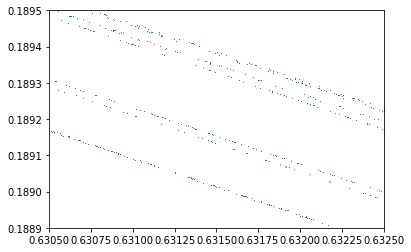

In [55]:
x_0 = 0.63135448
y_0 = 0.18940634
a = 1.4
b = 0.3
N = 5000000
(X, Y) = list(zip(*recursive_strange_map(x_0, y_0, a, b, N)))

plt.plot(X, Y, ',')
plt.xlim((0.6305, 0.6325))
plt.ylim((0.1889, 0.1895))
plt.show()

### Discussions

## Problem 4 (not done)

### P4.a

* Do numerical calculations for the bifucartion diagram by setting the control parameters on the intervals $a \in [0, 1.25]$ and $b=0.4$.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


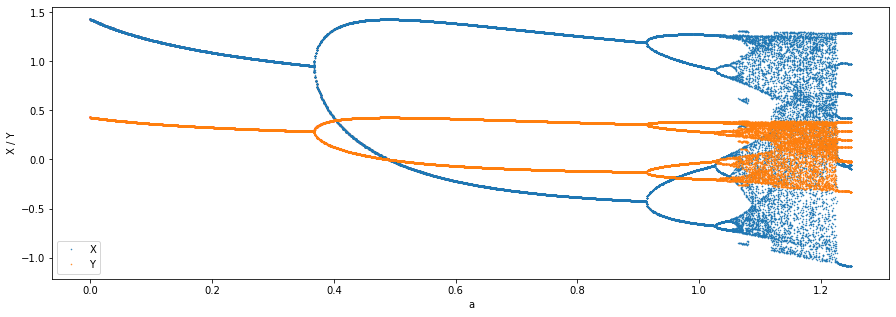

In [114]:
N = 2000
N_x = 100
N_y = 100
N_a = 1000
a_0 = 0
a_f = 1.25
X_0 = np.linspace(-2.5, 2.5, N_x)
Y_0 = np.linspace(-2.5, 2.5, N_y)
A = np.linspace(a_0, a_f, N_a)
b = 0.3

points = []
for a in A:
    (X, Y) = list(zip(*recursive_strange_map(X_0, Y_0, a, b, N)))
    x_f = X[-1]
    y_f = Y[-1]
    iteration_points = list(zip([a] * len(x_f), x_f, y_f))
    points += iteration_points

A, X, Y = list(zip(*points))

plt.figure(figsize=(15, 5))
plt.plot(A, X, '.', markersize=1, label='X')
plt.plot(A, Y, '.', markersize=1, label='Y')
plt.xlabel('a')
plt.ylabel('X / Y')
plt.legend()
plt.show()

### P4.b

* Plot the bifurcation diagram above for the following control parameter interval:
    * $a \in [0.9, 1,2]$
* Identify the attractors on this diagram and compare with the figure 2.17 of the Chaos (Alligood) book.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.


/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.


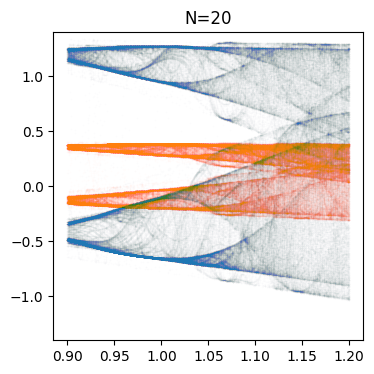

In [216]:
N = 20
N_x = 600
N_y = 600
N_a = 1000
a_0 = 0.9
a_f = 1.2
X_0 = np.linspace(-2.5, 2.5, N_x)
Y_0 = np.linspace(-2.5, 2.5, N_y)
A = np.linspace(a_0, a_f, N_a)
b = 0.3


points = []
for a in A:
    (X, Y) = list(zip(*recursive_strange_map(X_0, Y_0, a, b, N)))
    x_f = X[-1]
    y_f = Y[-1]
    iteration_points = list(zip([a] * len(x_f), x_f, y_f))
    points += iteration_points
    
A, X, Y = list(zip(*points))
A = np.array(A)
X = np.array(X)
Y = np.array(Y)
inds = np.abs(X) < 2
inds &= np.abs(Y) < 2
A = A[inds]
X = X[inds]
Y = Y[inds]

plt.figure(figsize=(4, 4))
plt.title("N={}".format(N))
plt.plot(A, X, '.', markersize=1, label='X', alpha=0.01)
plt.plot(A, Y, '.', markersize=1, label='Y', alpha=0.01)
#plt.axis('off')
plt.ylim((-1.4, 1.4))
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.


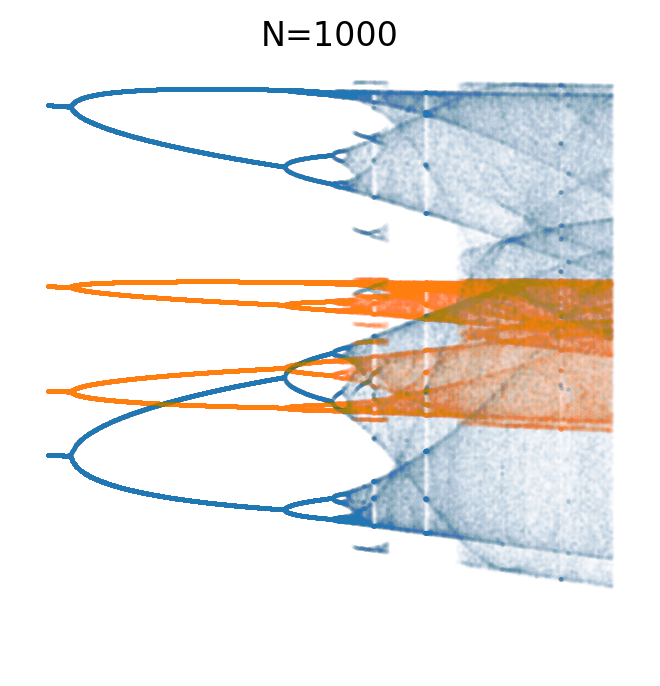

In [27]:
N = 1000
N_x = 600
N_y = 600
N_a = 1000
a_0 = 0.9
a_f = 1.2
X_0 = np.linspace(-2.5, 2.5, N_x)
Y_0 = np.linspace(-2.5, 2.5, N_y)
A = np.linspace(a_0, a_f, N_a)
b = 0.3


points = []
for a in A:
    (X, Y) = list(zip(*recursive_strange_map(X_0, Y_0, a, b, N)))
    x_f = X[-1]
    y_f = Y[-1]
    iteration_points = list(zip([a] * len(x_f), x_f, y_f))
    points += iteration_points
    
A, X, Y = list(zip(*points))
A = np.array(A)
X = np.array(X)
Y = np.array(Y)
inds = np.abs(X) < 2
inds &= np.abs(Y) < 2
A = A[inds]
X = X[inds]
Y = Y[inds]

plt.figure(figsize=(4, 4), dpi=200, facecolor='white')
plt.title("N={}".format(N))
plt.plot(A, X, '.', markersize=1, label='X', alpha=0.01)
plt.plot(A, Y, '.', markersize=1, label='Y', alpha=0.01)
plt.axis('off')
plt.ylim((-1.4, 1.4))
plt.show()